# Bigram of student name and surname

In [1]:
## Library

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [2]:
## Connect to google drive

from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
## Import week02_workshop.xlsx file

df = pd.read_excel("/content/gdrive/MyDrive/DataSci/The_data_master/python/week02/week02_workshop.xlsx")
df.columns = ['id', 'name', 'surname']
print(df)

        id        name            surname
0    101.0    Amornrat          Rattanung
1    102.0     analaya           Korsakul
2    103.0        Anan          Ubolkomut
3    104.0      Anawil  Tangvongsasiriwat
4    105.0      Anuwat      Bannaraksakul
..     ...         ...                ...
125  226.0       เอมอร      สว่างจิตเมตตา
126  227.0  Pornchanok      Sukatchasakul
127  228.0       พีรศุ        วัฒนศิรางค์
128  229.0       จตุพร          นาคเปี่ยม
129  230.0     Kanokon              Janda

[130 rows x 3 columns]


## Most apeared thai and english letter in name and surname

In [4]:
# Prep data
## make sure name and surname are capitalized

df['name'] = df['name'].str.capitalize()
df['surname'] = df['surname'].str.capitalize()

print(df)

        id        name            surname
0    101.0    Amornrat          Rattanung
1    102.0     Analaya           Korsakul
2    103.0        Anan          Ubolkomut
3    104.0      Anawil  Tangvongsasiriwat
4    105.0      Anuwat      Bannaraksakul
..     ...         ...                ...
125  226.0       เอมอร      สว่างจิตเมตตา
126  227.0  Pornchanok      Sukatchasakul
127  228.0       พีรศุ        วัฒนศิรางค์
128  229.0       จตุพร          นาคเปี่ยม
129  230.0     Kanokon              Janda

[130 rows x 3 columns]


In [5]:
# Detect Th and Eng language by using isascii attribute

name1 = 'Amornrat'
name2 = 'เอมอร'

print(name1.isascii())
print(name2.isascii())

True
False


In [6]:
# Create a new column of language list

list_lang = [df[['name']].iloc[i][0].isascii() for i in range(len(df[['name']]))]
df['is_eng'] = list_lang

print(df)

        id        name            surname  is_eng
0    101.0    Amornrat          Rattanung    True
1    102.0     Analaya           Korsakul    True
2    103.0        Anan          Ubolkomut    True
3    104.0      Anawil  Tangvongsasiriwat    True
4    105.0      Anuwat      Bannaraksakul    True
..     ...         ...                ...     ...
125  226.0       เอมอร      สว่างจิตเมตตา   False
126  227.0  Pornchanok      Sukatchasakul    True
127  228.0       พีรศุ        วัฒนศิรางค์   False
128  229.0       จตุพร          นาคเปี่ยม   False
129  230.0     Kanokon              Janda    True

[130 rows x 4 columns]


In [7]:
# find most appeared thai and english letter in name

## filter english and thai name and create a dataframe
df_en = df.query('is_eng == True').reset_index(drop = True)
df_th = df.query('is_eng != True').reset_index(drop = True)

print(df_en)
print(df_th)

       id        name            surname  is_eng
0   101.0    Amornrat          Rattanung    True
1   102.0     Analaya           Korsakul    True
2   103.0        Anan          Ubolkomut    True
3   104.0      Anawil  Tangvongsasiriwat    True
4   105.0      Anuwat      Bannaraksakul    True
..    ...         ...                ...     ...
63  164.0   Tummaprut       Sangpraserth    True
64  165.0     Voratat           Piromsuk    True
65  166.0     Yuttana           Kaewklam    True
66  227.0  Pornchanok      Sukatchasakul    True
67  230.0     Kanokon              Janda    True

[68 rows x 4 columns]
       id         name        surname  is_eng
0   167.0       กฤตภาส         ปิงฟอง   False
1   168.0         ภเสฐ    โสภาถาวรกิจ   False
2   169.0     กัญญาณัฐ      เครือจำปา   False
3   170.0  กิตติศักดิ์    เรืองกระโทก   False
4   171.0        กีรติ          เตปิน   False
..    ...          ...            ...     ...
57  224.0      อุกฤษฎ์       รัตนโชติ   False
58  225.0        อุเท

In [8]:
# Create count letter function

def countLetter(df, column_name) :
    try:
        text = df[column_name].str.lower() # convert to lower letter
        text_all = ''.join(text) # join all string together
        letter_count = {letter : text_all.count(letter) for letter in set(text_all)} # storing distinct set of letter as a key then count the result as value in dictionary
        return letter_count
    except KeyError:
        print(f'{column_name} not found in dataframe')

In [9]:
# Count english and thai letter in name

en_letter = countLetter(df_en,'name')
th_letter = countLetter(df_th,'name')

print(en_letter)
print(th_letter)

{'p': 29, 'c': 14, 't': 64, 'n': 52, 'g': 1, 'l': 5, 'k': 26, 'u': 21, 'a': 113, 'b': 2, 'v': 1, 'o': 24, 's': 18, 'j': 2, 'w': 14, 'r': 24, 'd': 4, 'y': 10, 'h': 29, 'm': 11, 'e': 12, 'i': 31}
{'น': 23, 'อ': 7, 'ญ': 10, 'ผ': 1, 'ป': 4, 'ฒ': 2, 'พ': 15, 'ฐ': 4, 'ต': 19, 'ม': 7, 'ย': 6, 'ส': 14, 'ั': 25, 'ณ': 8, 'ภ': 14, 'ิ': 39, 'ธ': 11, 'ว': 9, 'ฤ': 3, 'ฉ': 2, 'ล': 3, 'ษ': 3, 'ะ': 3, 'โ': 2, 'ู': 1, '่': 2, 'ฏ': 1, 'ท': 9, 'ร': 37, 'ด': 7, 'ฎ': 1, 'ง': 5, 'จ': 1, 'า': 24, 'ค': 7, 'ี': 4, 'บ': 1, 'ศ': 13, 'ก': 13, 'ช': 17, 'เ': 7, 'ุ': 10, '์': 23}


In [57]:
# create the dataframe

enLetter_df = pd.DataFrame(list(en_letter.items()), columns = ['Letter', 'Count'])
enLetter_df = enLetter_df.sort_values(by='Count', ascending=False).reset_index(drop = True)
thLetter_df = pd.DataFrame(list(th_letter.items()), columns = ['Letter', 'Count'])
thLetter_df = thLetter_df.sort_values(by='Count', ascending=False).reset_index(drop = True)

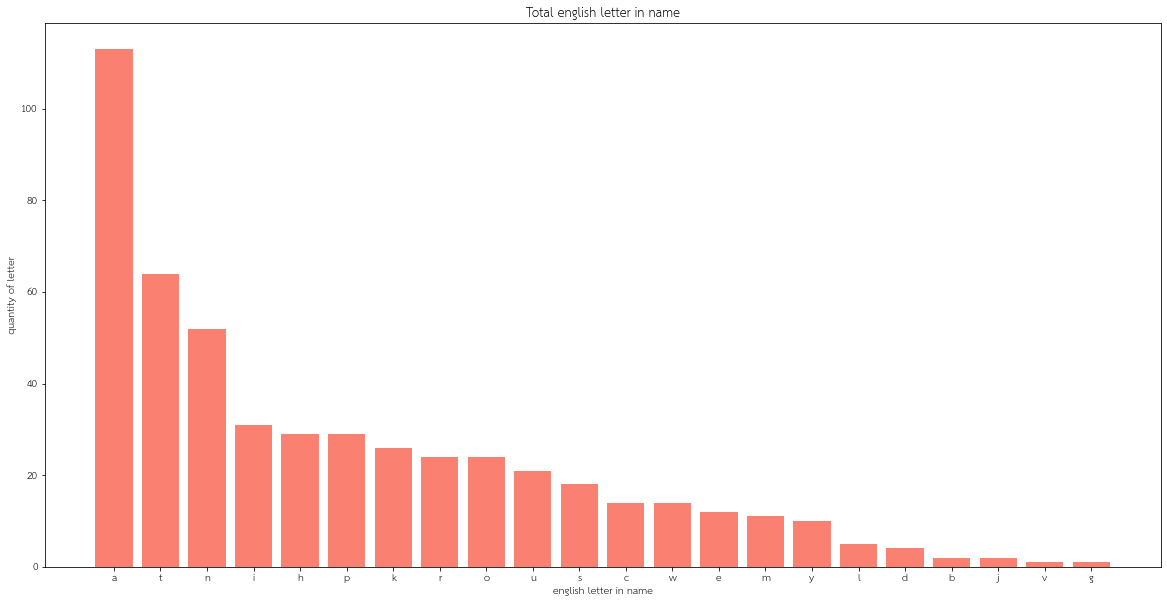

In [58]:
# plot total English letter in name

letter = enLetter_df['Letter']
count = enLetter_df['Count']

fig = plt.figure(figsize = (20, 10))

plt.title('Total english letter in name')
plt.bar(letter, count, color = 'salmon')
plt.xlabel('english letter in name')
plt.ylabel('quantity of letter')

plt.show()

In [12]:
# Install thsarabunnew-webfont

import matplotlib.font_manager as fm

!wget https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
fm.fontManager.ttflist += fm.createFontList(['thsarabunnew-webfont.ttf'])
plt.rc('font', family='TH Sarabun New')

--2023-01-23 13:35:32--  https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf [following]
--2023-01-23 13:35:32--  https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98308 (96K) [application/octet-stream]
Saving to: ‘thsarabunnew-webfont.ttf’

thsarabunnew-webfon 100%[===================>]  96.00K  --.-KB/s    in 0.01s   

2023-01-23 13:35:32 (9.74 MB/s) - ‘t

<ipython-input-12-2fd18264ae67>:6: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  fm.fontManager.ttflist += fm.createFontList(['thsarabunnew-webfont.ttf'])


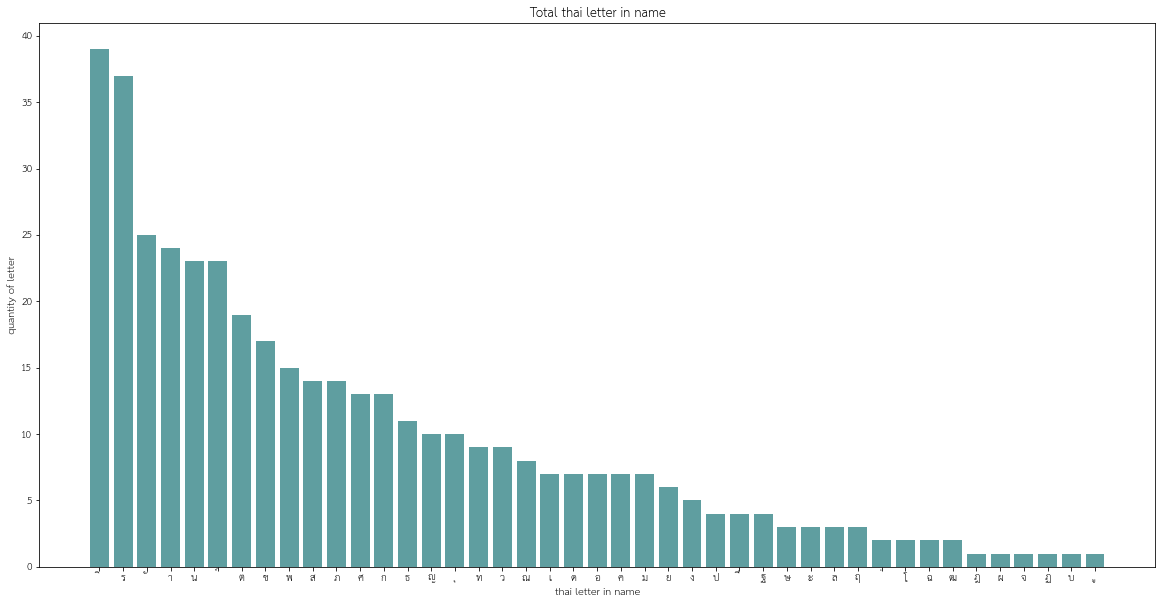

In [60]:
# plot total Thai letter in name

letter = thLetter_df['Letter']
count = thLetter_df['Count']

fig = plt.figure(figsize = (20, 10))

plt.title('Total thai letter in name')
plt.bar(letter, count, color = 'cadetblue')
plt.xlabel('thai letter in name')
plt.ylabel('quantity of letter')
plt.show()

In [14]:
# create bigram function

def bigram(text) :
    bigram = []
    for i in range(len(text) - 1) :
        bigram.append(text[i] + text[i + 1]) # create bigram value
        dict_bigram = dict.fromkeys(bigram) # using bigram as key to create dict to avoid duplicated value
    for n in dict_bigram :
        dict_bigram[n] = bigram.count(n) # count bigram
    return(dict_bigram)

In [15]:
# bigram english name and surname

name_en = ''.join(df_en['name'].str.lower())
surname_en = ''.join(df_en['surname'].str.lower())

bigram_name_en = bigram(name_en)
bigram_surname_en = bigram(surname_en)

print(bigram_name_en)
print(bigram_surname_en)

{'am': 5, 'mo': 2, 'or': 7, 'rn': 7, 'nr': 2, 'ra': 7, 'at': 26, 'ta': 10, 'an': 28, 'na': 13, 'al': 3, 'la': 3, 'ay': 5, 'ya': 9, 'aa': 1, 'aw': 8, 'wi': 1, 'il': 1, 'nu': 4, 'uw': 3, 'wa': 12, 'ar': 7, 'rt': 1, 'tc': 7, 'ch': 14, 'ha': 20, 'ab': 1, 'bh': 1, 'hu': 3, 'ur': 2, 'ri': 7, 'ib': 1, 'bo': 1, 'oo': 2, 'on': 5, 'nk': 2, 'ke': 2, 'ea': 1, 'ak': 11, 'ka': 13, 'nc': 4, 'tp': 7, 'po': 7, 'ol': 1, 'lc': 1, 'ko': 2, 'th': 9, 'ho': 2, 'ot': 1, 'ti': 8, 'it': 13, 'to': 1, 'ou': 1, 'uc': 1, 'hk': 1, 'ae': 1, 'em': 2, 'mm': 2, 'ma': 3, 'tk': 3, 'mi': 1, 'in': 2, 'np': 3, 'oj': 1, 'jk': 1, 'nt': 5, 'ik': 3, 'as': 5, 'sa': 7, 'tt': 9, 'iy': 2, 'en': 1, 'ni': 5, 'kk': 2, 'kh': 2, 'kr': 3, 'is': 1, 'sk': 1, 'ny': 2, 'ts': 3, 'ad': 2, 'da': 4, 'li': 1, 'me': 2, 'et': 3, 'te': 1, 'ee': 3, 'ap': 8, 'ph': 2, 'hi': 2, 'id': 2, 'wu': 1, 'ut': 5, 'tn': 2, 'un': 5, 'nn': 1, 'ip': 3, 'ng': 1, 'gn': 1, 'no': 4, 'op': 2, 'pp': 1, 'pa': 9, 'ru': 2, 'uj': 1, 'jp': 1, 'ne': 2, 'ep': 1, 'su': 6, 'up': 3,

In [68]:
# create dataframe

biEn_name_df = pd.DataFrame(list(bigram_name_en.items()), columns = ['Bigram', 'Count'])
biEn_name_df = biEn_name_df.sort_values(by='Count', ascending=False).reset_index(drop = True)
biEn_surname_df = pd.DataFrame(list(bigram_surname_en.items()), columns = ['Bigram', 'Count'])
biEn_surname_df = biEn_surname_df.sort_values(by='Count', ascending=False).reset_index(drop = True)

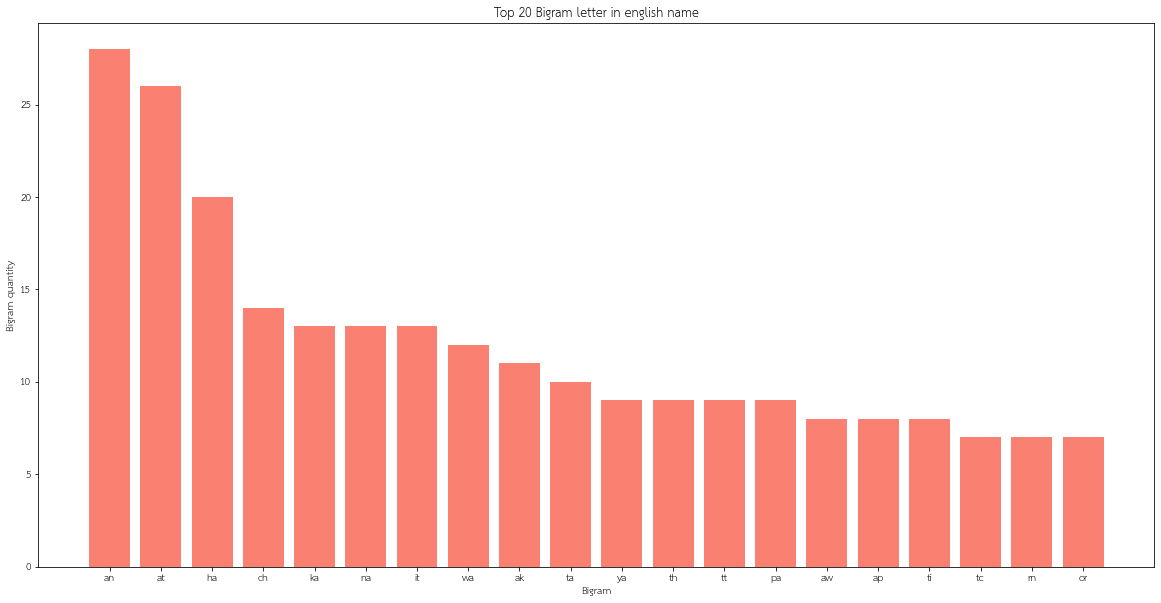

In [67]:
# plot bigram english name

bigram = biEn_name_df['Bigram'][:20]
count = biEn_name_df['Count'][:20]

fig = plt.figure(figsize = (20, 10))

plt.title('Top 20 Bigram letter in english name')
plt.bar(bigram, count, color = 'salmon')
plt.xlabel('Bigram')
plt.ylabel('Bigram quantity')
plt.show()

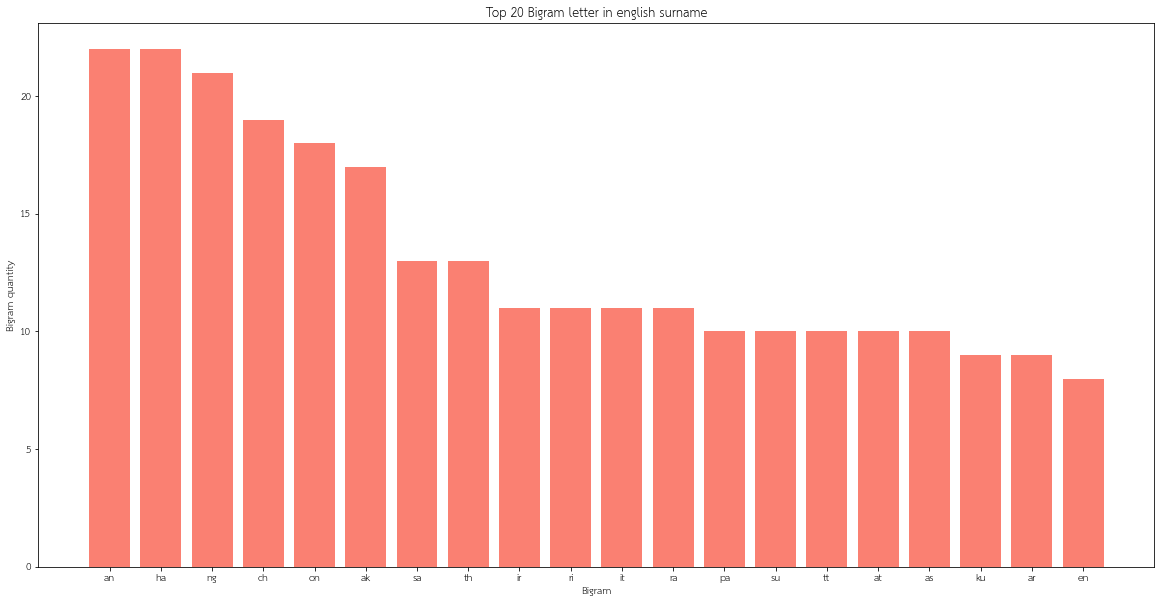

In [69]:
# plot bigram english surname

bigram = biEn_surname_df['Bigram'][:20]
count = biEn_surname_df['Count'][:20]

fig = plt.figure(figsize = (20, 10))

plt.title('Top 20 Bigram letter in english surname')
plt.bar(bigram, count, color = 'salmon')
plt.xlabel('Bigram')
plt.ylabel('Bigram quantity')
plt.show()

In [17]:
# bigram thai name and surname

name_th = ''.join(df_th['name'].str.lower())
surname_th = ''.join(df_th['surname'].str.lower())

bigram_name_th = bigram(name_th)
bigram_surname_th = bigram(surname_th)

print(bigram_name_th)
print(bigram_surname_th)

{'กฤ': 3, 'ฤต': 2, 'ตภ': 2, 'ภา': 3, 'าส': 3, 'สภ': 1, 'ภเ': 1, 'เส': 1, 'สฐ': 1, 'ฐก': 2, 'กั': 1, 'ัญ': 4, 'ญญ': 2, 'ญา': 3, 'าณ': 2, 'ณั': 4, 'ัฐ': 2, 'กิ': 1, 'ิต': 3, 'ตต': 1, 'ติ': 8, 'ิศ': 3, 'ศั': 3, 'ัก': 4, 'กด': 3, 'ดิ': 3, 'ิ์': 5, '์ก': 1, 'กี': 1, 'ีร': 3, 'รต': 2, 'ิค': 1, 'คม': 2, 'มศ': 1, '์ฉ': 1, 'ฉั': 2, 'ัต': 5, 'ตร': 2, 'รพ': 5, 'พร': 2, 'รช': 2, 'ชว': 1, 'วน': 1, 'นา': 1, 'าก': 1, 'กร': 1, 'ชา': 5, 'าค': 1, 'คร': 2, 'ริ': 5, 'ตช': 1, 'าญ': 3, 'ญณ': 1, 'ณร': 1, 'รง': 1, 'งค': 2, 'ค์': 3, '์ช': 1, 'ญย': 1, 'ยุ': 1, 'ุท': 1, 'ทธ': 4, 'ธช': 1, 'าต': 1, 'ิร': 4, 'รั': 7, 'กษ': 1, 'ษ์': 2, '์โ': 1, 'โช': 2, 'ชต': 2, 'รส': 1, 'สณ': 1, 'ฐพ': 1, 'พล': 1, 'ลต': 1, 'ิณ': 1, 'ณณ': 1, 'ณภ': 1, 'ภพ': 1, 'พท': 1, 'ทิ': 2, 'ิพ': 4, 'พย': 1, 'ย์': 3, '์ว': 3, 'วิ': 2, 'ิม': 2, 'มล': 1, 'ลธ': 1, 'ธน': 3, 'นฉ': 1, 'รธ': 1, 'นเ': 2, 'เด': 2, 'ดช': 2, 'ชธ': 1, 'นิ': 2, 'ิน': 1, 'นธ': 2, 'ธั': 2, 'ญช': 1, 'ชน': 2, 'นก': 1, 'กธ': 1, 'ญม': 1, 'มน': 1, 'ธิ': 4, 'ิด': 1, 'ดา': 1, 'าร': 2, 

In [70]:
# create dataframe

biTh_name_df = pd.DataFrame(list(bigram_name_th.items()), columns = ['Bigram', 'Count'])
biTh_name_df = biTh_name_df.sort_values(by='Count', ascending=False).reset_index(drop = True)
biTh_surname_df = pd.DataFrame(list(bigram_surname_th.items()), columns = ['Bigram', 'Count'])
biTh_surname_df = biTh_surname_df.sort_values(by='Count', ascending=False).reset_index(drop = True)

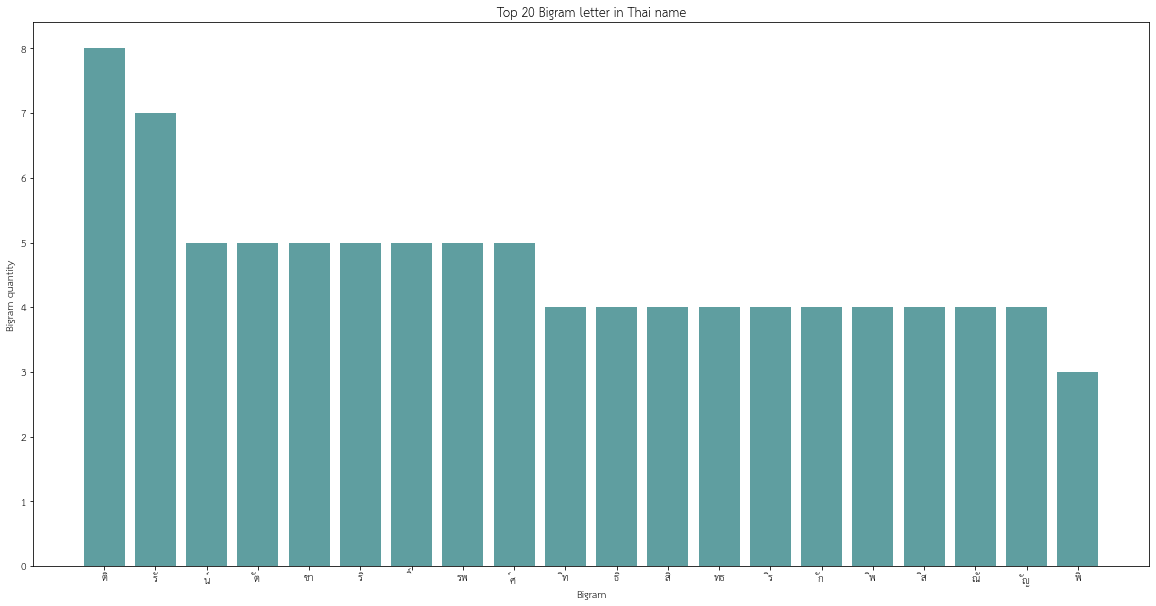

In [71]:
# plot bigram thai name

bigram = biTh_name_df['Bigram'][:20]
count = biTh_name_df['Count'][:20]

fig = plt.figure(figsize = (20, 10))

plt.title('Top 20 Bigram letter in Thai name')
plt.bar(bigram, count, color = 'cadetblue')
plt.xlabel('Bigram')
plt.ylabel('Bigram quantity')
plt.show()

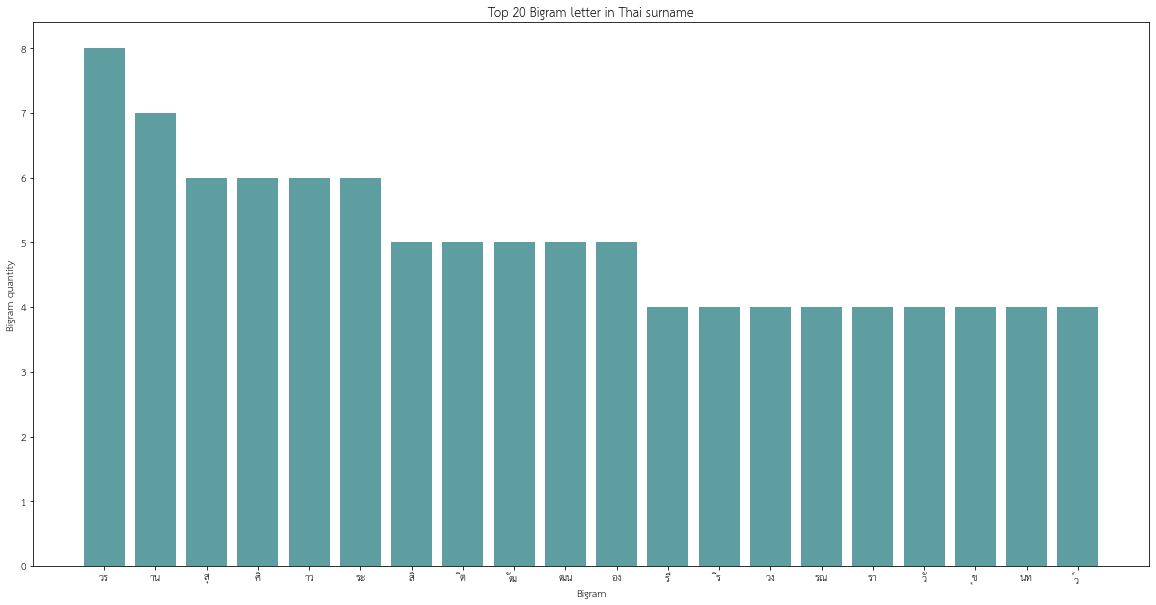

In [72]:
# plot bigram thai surname

bigram = biTh_surname_df['Bigram'][:20]
count = biTh_surname_df['Count'][:20]

fig = plt.figure(figsize = (20, 10))

plt.title('Top 20 Bigram letter in Thai surname')
plt.bar(bigram, count, color = 'cadetblue')
plt.xlabel('Bigram')
plt.ylabel('Bigram quantity')
plt.show()